In [9]:
# !pip install ultralytics
# !pip install roboflow
# !pip install python-dotenv

Defaulting to user installation because normal site-packages is not writeable


# 1. Inference on test images and videos 

Yolo CLI will be used to make inference on test images and videos.

## First attempt (webp image)

In [2]:
!yolo track source="data/internet_image_attempt_1.webp" save=True

/Users/pribas/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
WARNING ⚠️ 'model' argument is missing. Using default 'model=yolov8n.pt'.
100%|██████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 26.9MB/s]
requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.3 MB/s eta 0:00:0000:01

requirements: AutoUpdate success ✅ 2.2s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

Ultralytics YOLOv8.1.45 🚀 Python-3.9.6 torch-2.2.1 CPU (Apple M1 Pro)
YOLOv8n s

Results are as follows:

<img src="runs/detect/track/internet_image_attempt_1.webp" alt="drawing" width="500"/>

## Second attempt (jpeg smaller image)

Let's try another image:

In [3]:
!yolo track source="data/internet_image_attempt_2.jpeg" save=True

/Users/pribas/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
WARNING ⚠️ 'model' argument is missing. Using default 'model=yolov8n.pt'.
Ultralytics YOLOv8.1.45 🚀 Python-3.9.6 torch-2.2.1 CPU (Apple M1 Pro)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /Users/pribas/Documents/Formació/Màster en Ciència de Dades/Tècniques Avançades en Machine Learning/taml-project-2-udg/data/internet_image_attempt_2.jpeg: 480x640 1 banana, 1 apple, 1 orange, 53.4ms
Speed: 2.5ms preprocess, 53.4ms inference, 572.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/track2
💡 Learn more at https://docs.ultralytics.com/modes/track


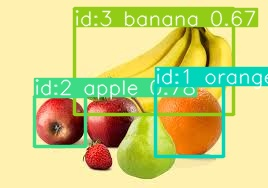

It hasn't detected both apples in the image, only one.

## Third attempt (home-made video)

In [4]:
!yolo track source="data/IMG_5025.MOV" save=True

/Users/pribas/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
WARNING ⚠️ 'model' argument is missing. Using default 'model=yolov8n.pt'.
Ultralytics YOLOv8.1.45 🚀 Python-3.9.6 torch-2.2.1 CPU (Apple M1 Pro)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

video 1/1 (frame 1/978) /Users/pribas/Documents/Formació/Màster en Ciència de Dades/Tècniques Avançades en Machine Learning/taml-project-2-udg/data/IMG_5025.MOV: 384x640 1 banana, 1 bed, 1 teddy bear, 49.0ms
video 1/1 (frame 2/978) /Users/pribas/Documents/Formació/Màster en Ciència de Dades/Tècniques Avançades en Machine Learning/taml-project-2-udg/data/IMG_5025.MOV: 384x640 1 banana, 1 bed, 1 teddy bear, 43.7ms
video 1/1 (frame 3/978) /Users/pribas/Documents/Formació/Màster en Ciència de Dades/T

Analyzing the video we can see that classes banana, teddy bear, laptop and even bed, are well recognized. But it can't recognize the backpack. 

Here are a few images:

<img src="runs/detect/track3/attempt_3_img_1.png" width="500"/>
<img src="runs/detect/track3/attempt_3_img_2.png" width="500"/>

# 2. Transfer learning on a custom dataset to detect a novel object class
https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/ 

1. First of all, we will be creating a new Roboflow account in roboflow.com.
2. From Roboflow Universe, we will be using a community custom dataset to train for a new class (luggage / backpack / bags).
3. For this project, we have selected `luggage-v22`.

## 2.1. Select Dataset on Roboflow Universe

Dataset selected is made of +1400 images of backpacks, only.

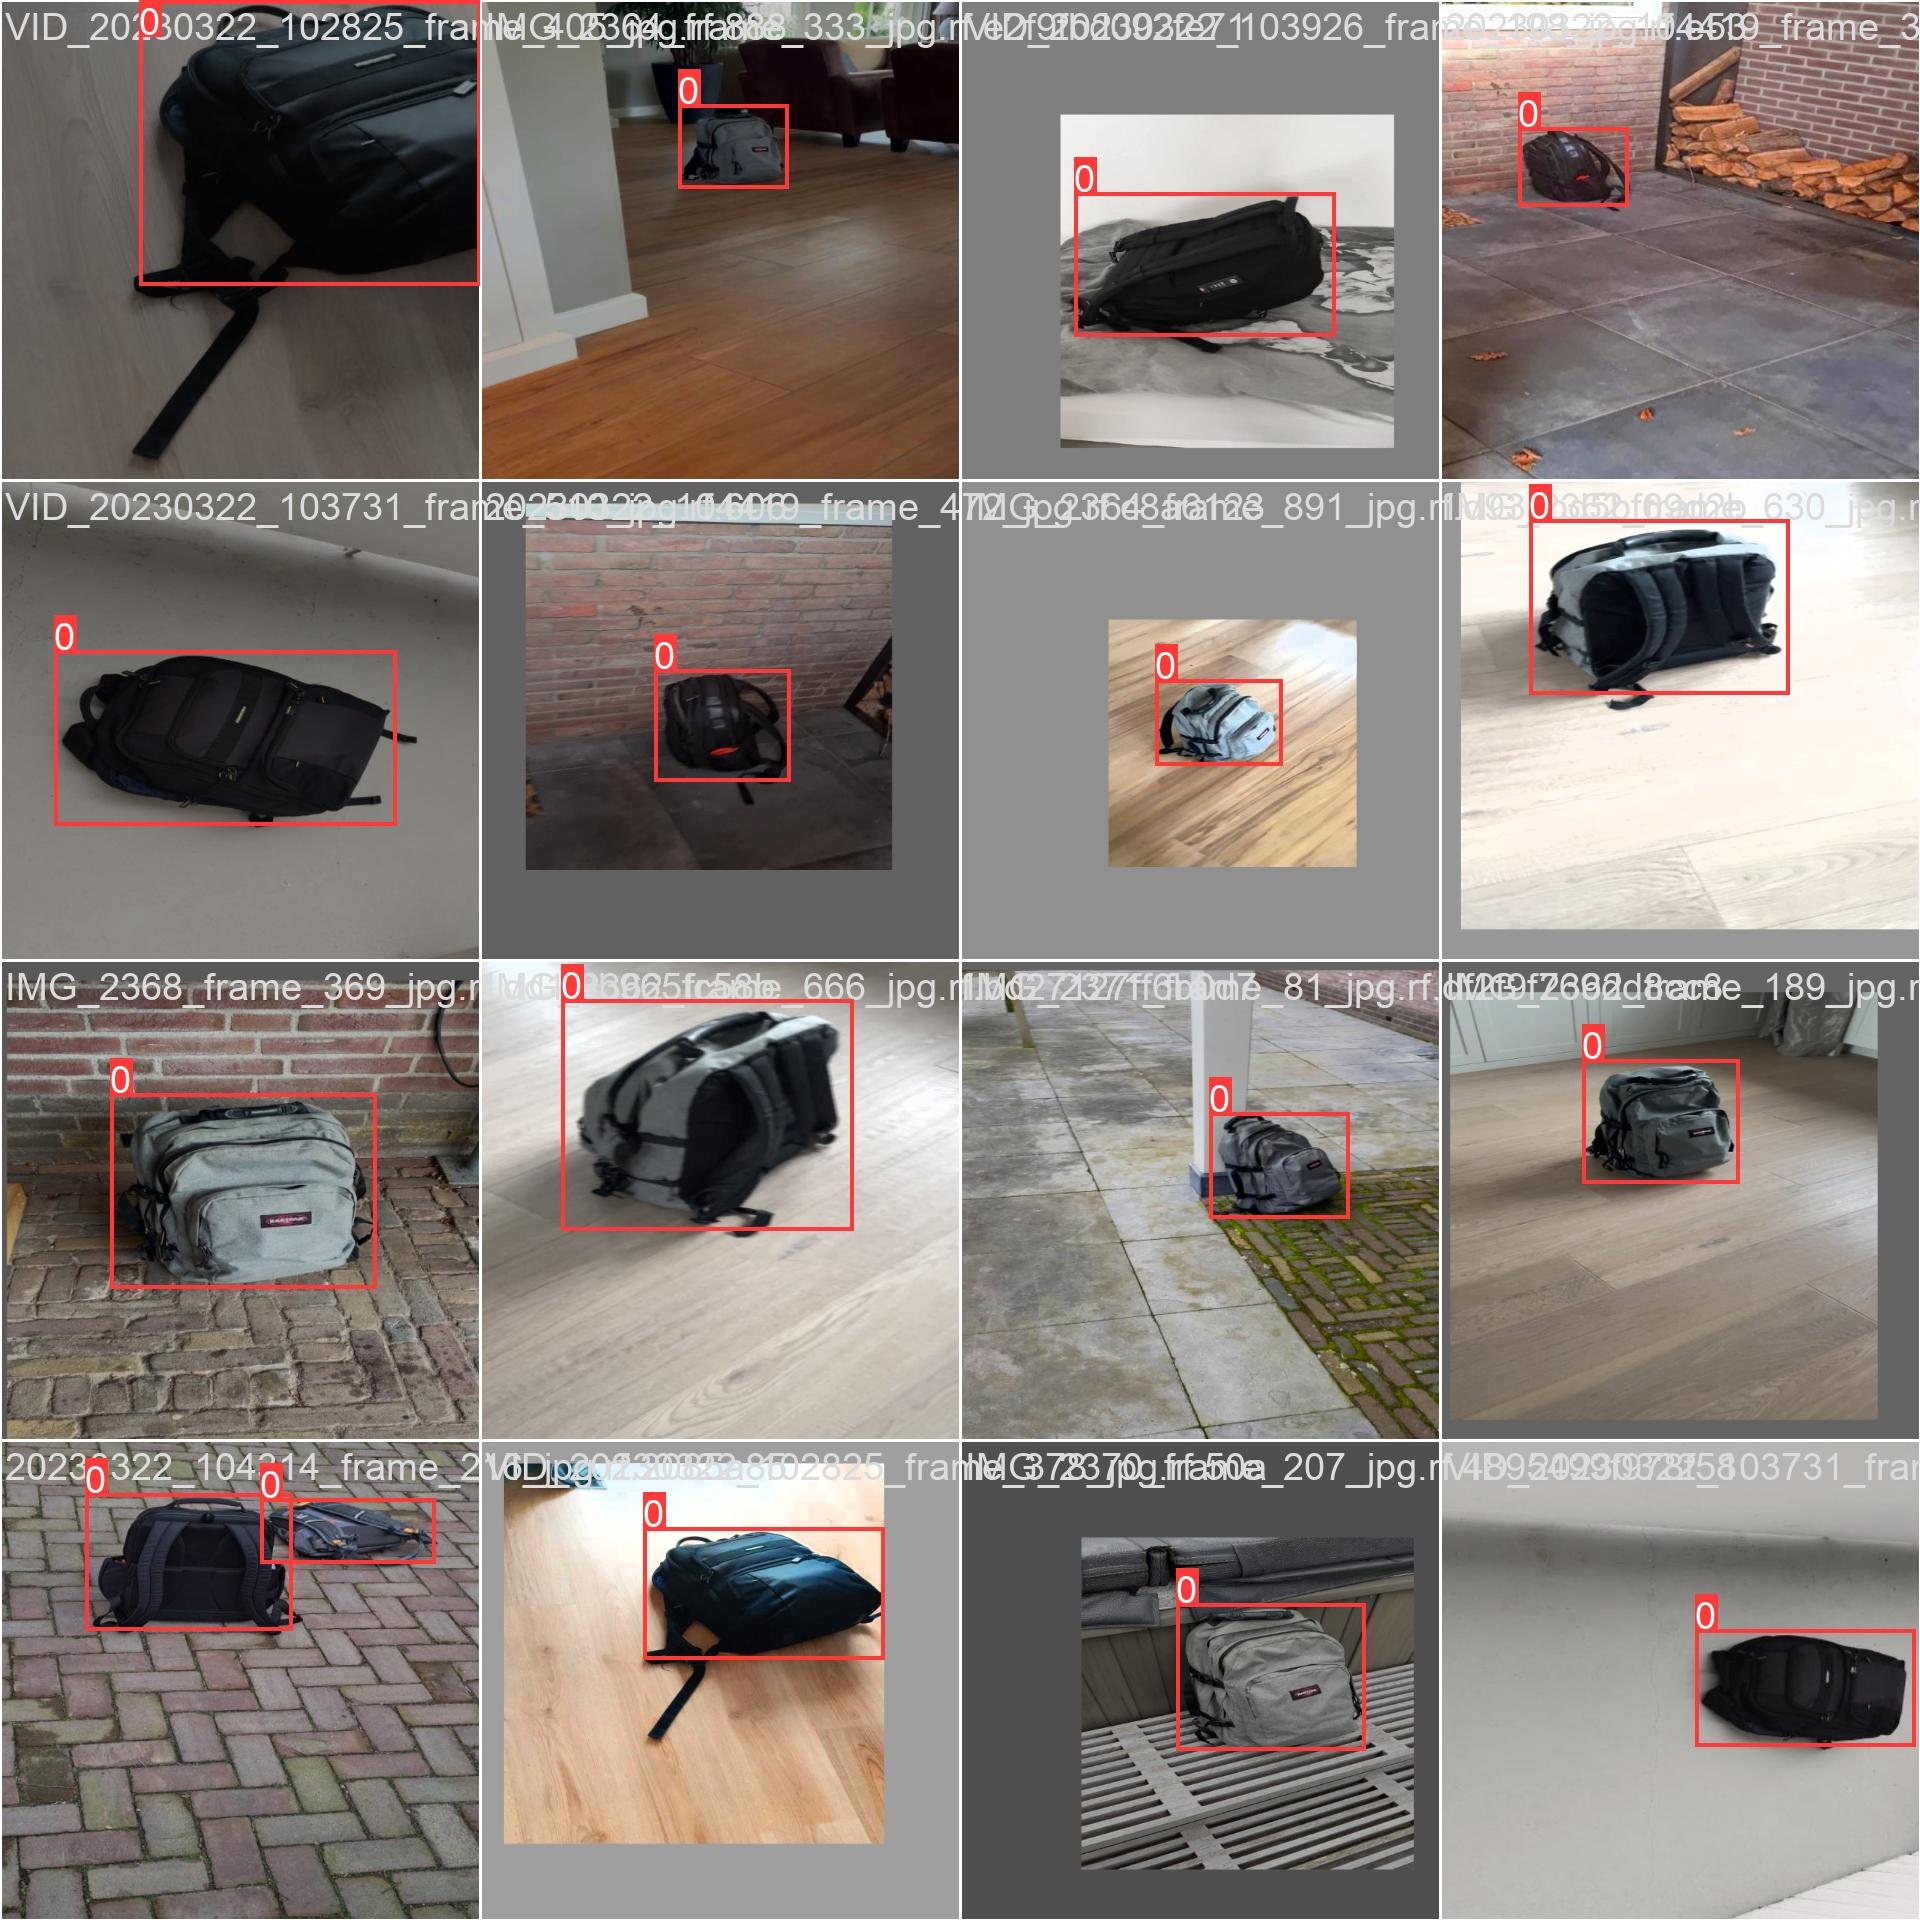

In [11]:
from roboflow import Roboflow
from dotenv import load_dotenv
import os

In [13]:
load_dotenv()

True

In [17]:
rf = Roboflow(api_key=os.getenv("ROBOFLOW_API_KEY"))
project = rf.workspace("school-f9hws").project("lug")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.45, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Lug-2 in yolov8:: 100%|██████████| 3060/3060 [00:00<00:00, 8344.77it/s]


Few files have been created in `Lug-2`. Now let's train.

## 2.2. Train YOLOv8 on a custom dataset

In [29]:
!yolo task=detect mode=train model=yolov8s.pt data=Lug-2/data.yaml epochs=100 imgsz=640

/Users/pribas/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Ultralytics YOLOv8.1.47 🚀 Python-3.9.6 torch-2.2.1 CPU (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=Lug-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_st

## 2.3. Validate with a new model

When the training is over, it is good practice to validate the new model on images it has not seen before. Therefore, when creating a dataset, we divide it into three parts, and one of them that we will use now as a test dataset.

In [30]:
!yolo task=detect mode=val model=runs/detect/train3/weights/best.pt data=Lug-2/data.yaml

/Users/pribas/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Ultralytics YOLOv8.1.47 🚀 Python-3.9.6 torch-2.2.1 CPU (Apple M1 Pro)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /Users/pribas/Documents/Formació/Màster en Ciència de Dades/Tècniq
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        153        153          1          1      0.995      0.979
Speed: 0.6ms preprocess, 427.0ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


Seems like even after +80 epochs of training, the model still was able to improve box loss while training:

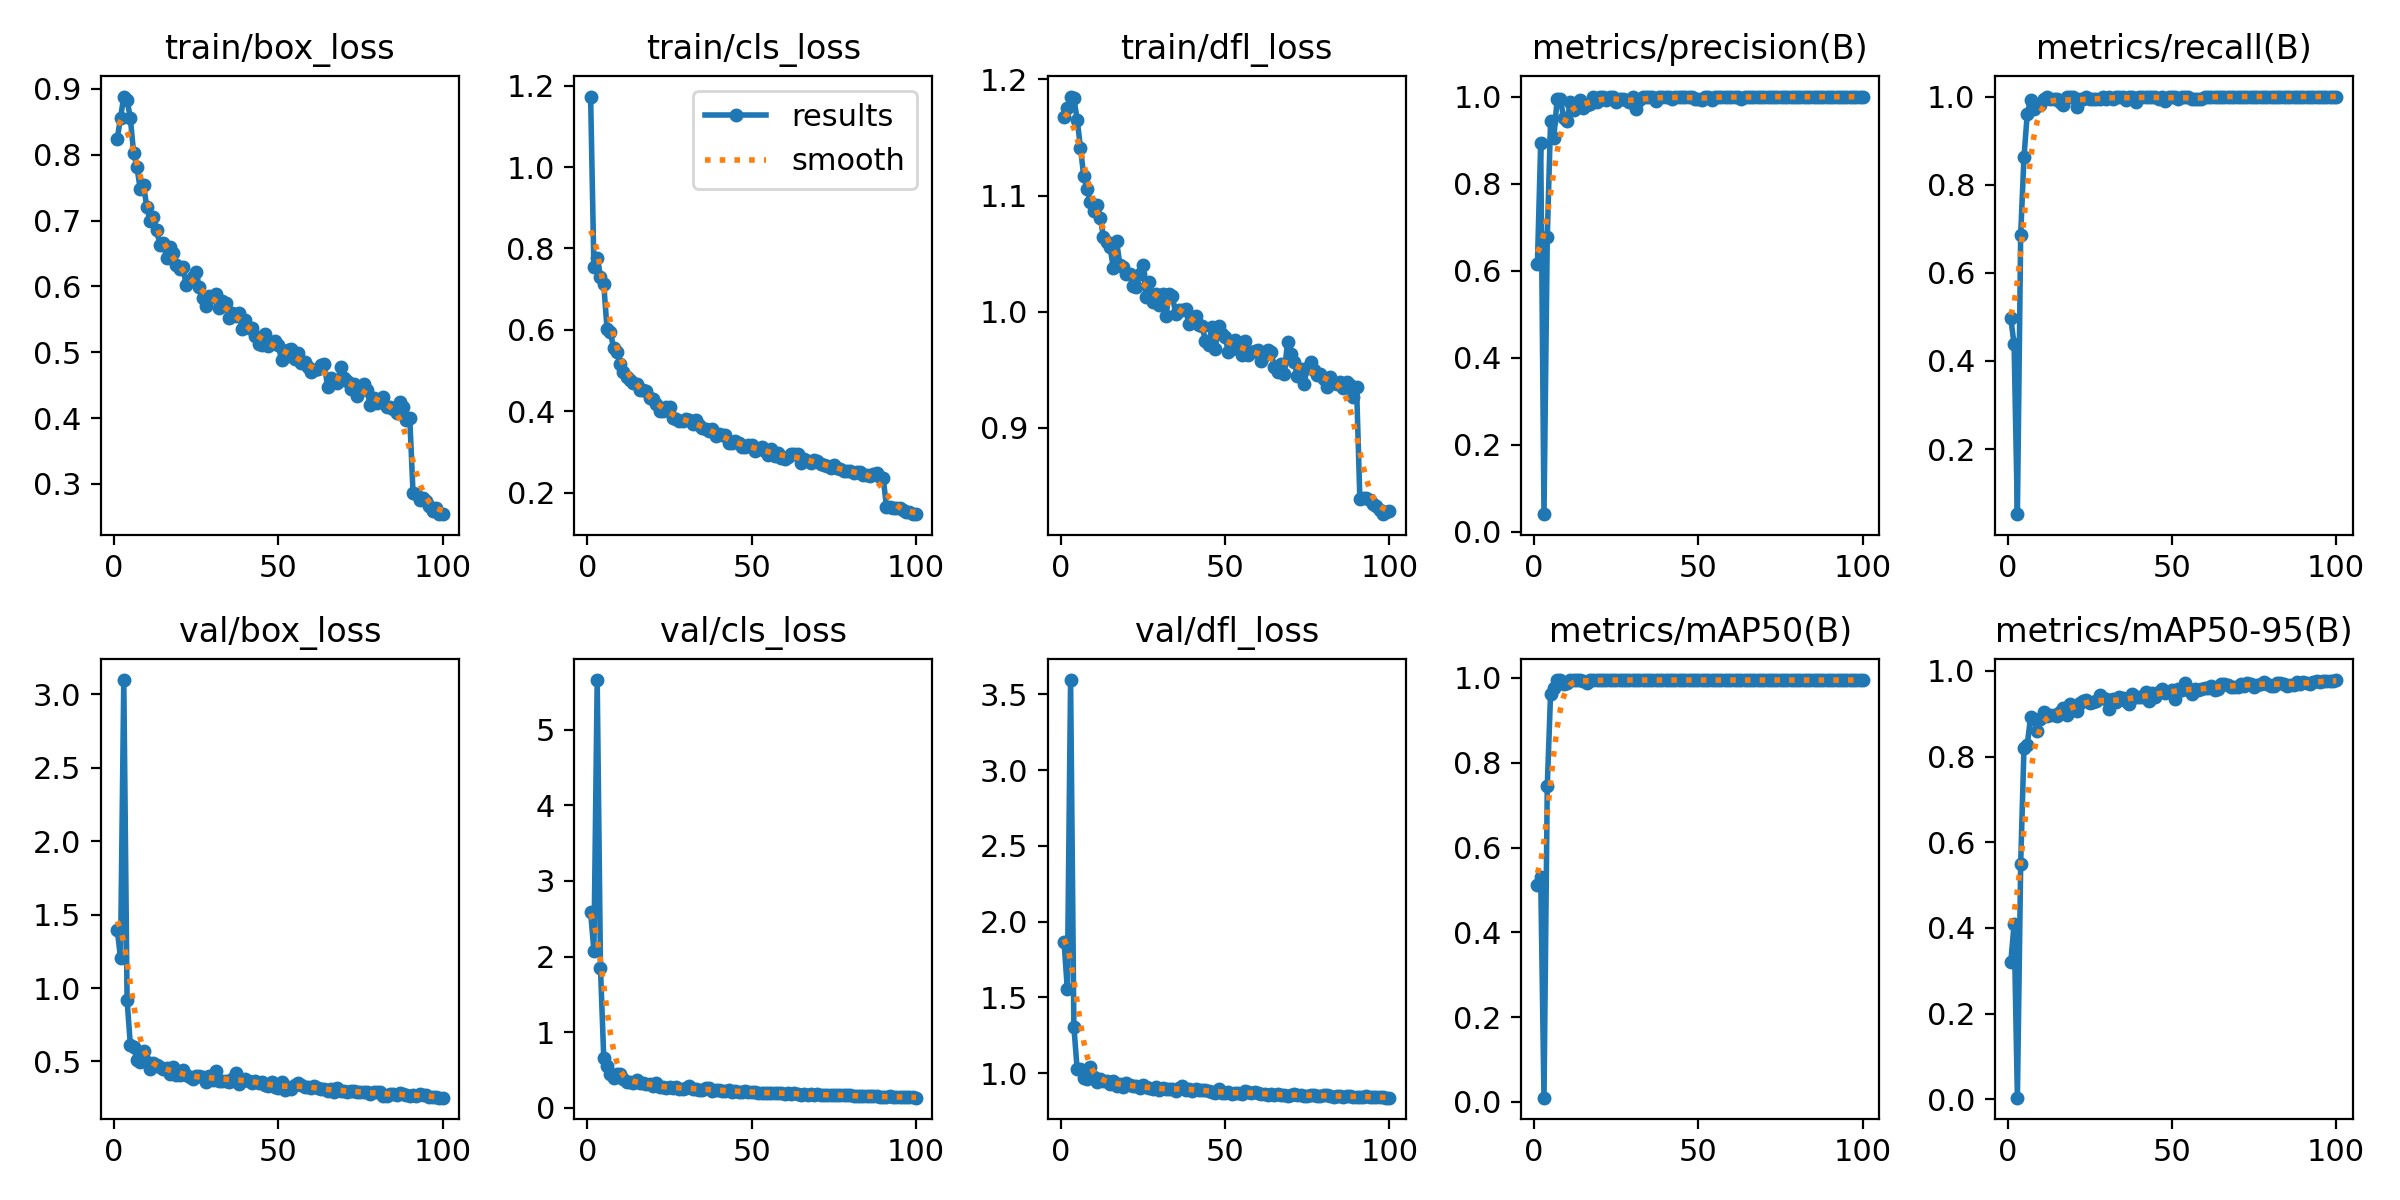

## 2.4. Predict with a custom model

In [32]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source=datasets/Lug-2/test/images

/Users/pribas/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Ultralytics YOLOv8.1.47 🚀 Python-3.9.6 torch-2.2.1 CPU (Apple M1 Pro)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/152 /Users/pribas/Documents/Formació/Màster en Ciència de Dades/Tècniques Avançades en Machine Learning/taml-project-2-udg/datasets/Lug-2/test/images/20230322_103749-16_png.rf.cfe835dd97707d9958071e616010f362.jpg: 640x640 1 Backpack, 124.6ms
image 2/152 /Users/pribas/Documents/Formació/Màster en Ciència de Dades/Tècniques Avançades en Machine Learning/taml-project-2-udg/datasets/Lug-2/test/images/20230322_103749-18_png.rf.da08cd6d443b4b597e8e7a64a5bc9819.jpg: 640x640 1 Backpack, 115.2ms
image 3/152 /Users/pribas/Documents/Formació/Màster en Ciència de Dades/Tèc

In [34]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.6 source=data/IMG_5025.MOV

/Users/pribas/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Ultralytics YOLOv8.1.47 🚀 Python-3.9.6 torch-2.2.1 CPU (Apple M1 Pro)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/978) /Users/pribas/Documents/Formació/Màster en Ciència de Dades/Tècniques Avançades en Machine Learning/taml-project-2-udg/data/IMG_5025.MOV: 384x640 (no detections), 102.8ms
video 1/1 (frame 2/978) /Users/pribas/Documents/Formació/Màster en Ciència de Dades/Tècniques Avançades en Machine Learning/taml-project-2-udg/data/IMG_5025.MOV: 384x640 (no detections), 76.0ms
video 1/1 (frame 3/978) /Users/pribas/Documents/Formació/Màster en Ciència de Dades/Tècniques Avançades en Machine Learning/taml-project-2-udg/data/IMG_5025.MOV: 384x640 (no detections),

Finally the backpack has been detected:

<img src="data/predict_backpack.png" width="500"/>

However, some frames have not been well recognized:

<img src="data/predict_backpack_2.png" width="500"/>

It should have been good to train all 80 classes + backpack class to see how everything fits together.